<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Resturant__Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part-1: Data Preprocessing

## Dataset & Library Importation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read data & apply quoting argument to ignore quotes

r_data = pd.read_csv("/content/Restaurant_Reviews.tsv", delimiter= "\t", quoting= 3)

In [ ]:
# Data head-tail preview

r_data.head(-5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0


## Data Exploration

In [ ]:
r_data.shape

(1000, 2)

In [ ]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
r_data.columns

Index(['Review', 'Liked'], dtype='object')

### Statistical Summary

In [ ]:
r_data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing With Missing Values

In [ ]:
r_data.isnull().values.any(), r_data.isnull().values.sum()

(False, 0)

## CountPlot

<Axes: ylabel='count'>

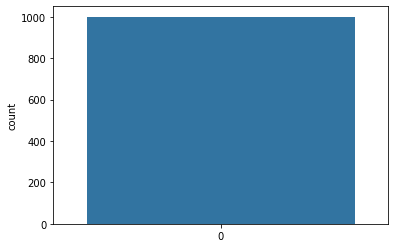

In [ ]:
sns.countplot(r_data["Liked"])

In [ ]:
# Positive Reviews

(r_data.Liked == 1).sum()

500

In [ ]:
# Negative Reviews

(r_data.Liked == 0).sum()

500

## Length Of Messages

In [ ]:
r_data.head(-5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0


In [ ]:
# Creating a new columns -" Length Of Message"- LOM

r_data["LOM"] = r_data["Review"].apply(len)

In [ ]:
# Preview data head-tail

r_data.head(-5)

,Review,Liked,LOM
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
990,The refried beans that came with my meal were ...,0,90
991,Spend your money and time some place else.,0,42
992,A lady at the table next to us found a live gr...,0,75
993,the presentation of the food was awful.,0,39


### Histogram

<Axes: ylabel='Frequency'>

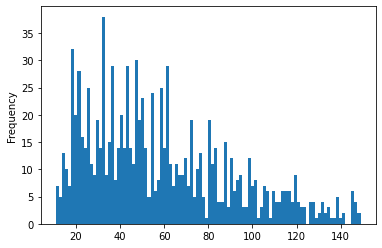

In [ ]:
r_data["LOM"].plot(bins= 100, kind= "hist", )

In [ ]:
# Checking statistical Summary of LOM

r_data.LOM.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: LOM, dtype: float64

In [ ]:
# Getting the Longest Message in dataset

r_data[r_data["LOM"] == 149]["Review"].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [ ]:
# Getting the Shortest Message in dataset

r_data[r_data["LOM"] == 11]["Review"].iloc[0]

'DELICIOUS!!'

In [ ]:
# Creating 2 Variable Positive & Negative

positive = r_data[r_data["Liked"] == 1]
negative = r_data[r_data["Liked"] == 0]

In [ ]:
# Prview positive

positive.head(-5)

,Review,Liked,LOM
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
891,Their rotating beers on tap is also a highligh...,1,62
894,If you stay in Vegas you must get breakfast he...,1,63
895,I want to first say our server was great and w...,1,68
896,The pizza selections are good.,1,30


In [ ]:
# Preview Negative

negative.head(-5)

,Review,Liked,LOM
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
990,The refried beans that came with my meal were ...,0,90
991,Spend your money and time some place else.,0,42
992,A lady at the table next to us found a live gr...,0,75
993,the presentation of the food was awful.,0,39


In [ ]:
# Check the Statistical Summary for Positive Reviews

positive.describe()

,Liked,LOM
count,500.0,500.000000
mean,1.0,55.880000
std,0.0,30.219464
min,1.0,11.000000
25%,1.0,32.750000
50%,1.0,49.500000
75%,1.0,73.250000
max,1.0,148.000000


In [ ]:
# Check the Statistical Summary for negative Reviews

negative.describe()

,Liked,LOM
count,500.0,500.000000
mean,0.0,60.750000
std,0.0,34.224935
min,0.0,11.000000
25%,0.0,33.000000
50%,0.0,52.500000
75%,0.0,84.000000
max,0.0,149.000000


## Cleaning The Text

In [ ]:
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create an empty list

corpus = []

for i in range (0, 1000):

  # Define another variable
  review = re.sub("^a-zA-Z"," ", r_data["Review"][i])

  # Redefine
  review = review.lower()
  review = review.split()

  # Create an instance of the class - porterStemmer
  ps = PorterStemmer()
  all_stopwords = stopwords.words("english")
  all_stopwords.remove("not")

  # Applying the Stemmer
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = " ".join(review)
  corpus.append(review)

In [ ]:
corpus

['wow... love place.',
 'crust not good.',
 'not tasti textur nasty.',
 'stop late may bank holiday rick steve recommend love it.',
 'select menu great prices.',
 'get angri want damn pho.',
 'honeslti tast fresh.)',
 'potato like rubber could tell made ahead time kept warmer.',
 'fri great too.',
 'great touch.',
 'servic prompt.',
 'would not go back.',
 'cashier care ever say still end wayyy overpriced.',
 'tri cape cod ravoli, chicken, cranberry...mmmm!',
 'disgust pretti sure human hair.',
 'shock sign indic cash only.',
 'highli recommended.',
 'waitress littl slow service.',
 'place not worth time, let alon vegas.',
 'not like all.',
 'burritto blah!',
 'food, amazing.',
 'servic also cute.',
 'could care less... interior beautiful.',
 'performed.',
 "that' right....th red velvet cake.....ohhh stuff good.",
 '- never brought salad ask for.',
 'hole wall great mexican street tacos, friendli staff.',
 'took hour get food 4 tabl restaur food luke warm, sever run around like total o

In [ ]:
len(corpus)

1000

## Creating the Bag of Words Model

In [ ]:
# Import Class

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create an instance of class

cv = CountVectorizer(max_features= 1500)

In [ ]:
# Define x & y

x = cv.fit_transform(corpus).toarray()
y = r_data.iloc[:, 1]

In [ ]:
# View values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [ ]:
# View shape

x.shape, y.shape

((1000, 1500), (1000,))

## Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train.shape, x_test.shape

((800, 1500), (200, 1500))

In [ ]:
y_train

968    0
452    0
145    1
589    0
602    1
      ..
764    1
441    1
737    1
240    0
660    1
Name: Liked, Length: 800, dtype: int64

In [ ]:
y_test

891    1
121    0
290    0
763    0
370    0
      ..
202    0
260    1
809    1
982    0
818    0
Name: Liked, Length: 200, dtype: int64

In [ ]:
y_train.shape, y_test.shape

((800,), (200,))

# Part-2: Model Building

## Model-1: Naive Bayes

In [ ]:
# Import Class

from sklearn.naive_bayes import GaussianNB

# Create an instance of class

classifier_nb = GaussianNB()

# Train the Model

classifier_nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
# Make a Prediction

y_pred = classifier_nb.predict(x_test)

### Performance Evaluation

In [ ]:
# Evaluate the performance

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

# Evaluate the performance

conf_m = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

print("conf_m: {}  \nacc: {} \nf1: {} \nrs: {} \nps: {}".format(conf_m, acc*100, f1*100, rs*100, ps*100))

conf_m: [[51 55]
 [18 76]]  
acc: 63.5 
f1: 67.55555555555556 
rs: 80.85106382978722 
ps: 58.01526717557252


### Confusion Matrix Visual

Text(0.5, 15.0, 'Predicted label')

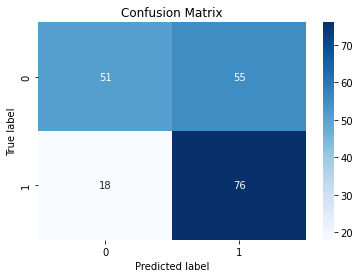

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# plot the matrix
sns.heatmap(conf_m, annot=True, cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')


## Model-2: XGBoost Classifier

In [ ]:
# Import the Library

from xgboost import XGBClassifier

# Create an instance of the class

classifier_xgb = XGBClassifier(random_state= 0)

# Train the model

classifier_xgb.fit(x_train, y_train)

# Make Predictions

y_pred = classifier_xgb.predict(x_test)

### Preformance Evaluation

In [ ]:
# Evaluate the performance

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score

# Evaluate the performance

conf_m = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

print("conf_m: {}  \nacc: {} \nf1: {}  \nr2: {} \nrs: {} \nps: {}".format(conf_m, acc*100, f1*100, r2*100, rs*100, ps*100))

conf_m: [[87 19]
 [23 71]]  
acc: 79.0 
f1: 77.17391304347827  
r2: 15.69650742673624 
rs: 75.53191489361703 
ps: 78.88888888888889


### Confusion Matrix Visual

Text(0.5, 15.0, 'Predicted label')

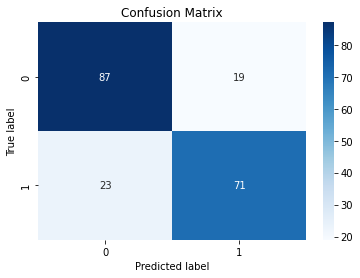

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# plot the matrix
sns.heatmap(conf_m, annot=True, cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Part-3: Parameter Optimization

In [ ]:
# ImportClass

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}

In [ ]:
param_grid

{'n_estimators': [100, 500, 1000],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}

In [ ]:
# Create an Instance
random_cv = RandomizedSearchCV(estimator= classifier_xgb, param_distributions= param_grid, n_iter= 10,
                               scoring= "neg_mean_absolute_error", cv= 5, verbose= 2, n_jobs= -1)

In [ ]:
# Train the model

random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[16:42:08] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_leaf", "min_samples_split" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
random_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='friedman_mse',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=2,
              min_samples_split=2, missing=nan, monotone_constraints=None, ...)

In [ ]:
random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'friedman_mse',
 'bootstrap': True}

In [ ]:
random_cv.best_score_

-0.31500000000000006

# Part-4: Final Model

## Model-3: XBG-Applied

In [ ]:
# Import the Class

from xgboost import XGBClassifier

# Create an instance of class and apply best estimator

classifier = XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='friedman_mse',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=2,
              min_samples_split=2, missing=0, monotone_constraints=None)



In [ ]:
# Train the model

classifier.fit(x_train, y_train)


[16:56:04] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "criterion", "max_features", "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='friedman_mse',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=2,
              min_samples_split=2, missing=0, monotone_constraints=None, ...)

In [ ]:
# Make Predictions

y_pred = classifier.predict(x_test)

### Performance Evaluation

In [ ]:
# Evaluate the performance

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score

# Evaluate the performance

conf_m = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)

print("conf_m: {}  \nacc: {} \nf1: {}  \nr2: {} \nrs: {} \nps: {}".format(conf_m, acc*100, f1*100, r2*100, rs*100, ps*100))

conf_m: [[89 17]
 [22 72]]  
acc: 80.5 
f1: 78.68852459016394  
r2: 21.718185467683647 
rs: 76.59574468085107 
ps: 80.89887640449437


### Confusion Matrix Visual

Text(0.5, 15.0, 'Predicted label')

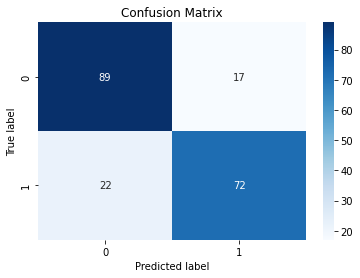

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# create the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# plot the matrix
sns.heatmap(conf_m, annot=True, cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')